In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_histogram(hist, min, max):
  plt.bar(list(range(min, max)), hist[min:max], align='center', width=0.9)
  plt.xlabel('Number of cards')
  plt.xticks(list(range(min, max)))
  plt.title('Experimental distribution of cards to get 21')
  plt.show()

In [3]:
def calculate_probability(cards, n, initial_sum=0):
  count = 0
  cards_distribution = [0]*11
  min_distribution = 11
  max_distribution = 1
  for i in range(n):
    cards_copy = cards.copy()
    sum = initial_sum
    cards_count = 0
    while sum < 21:
      choice = r.choice(cards_copy)
      cards_copy.remove(choice)
      sum += choice
      cards_count += 1
    if sum == 21:
      min_distribution = cards_count if cards_count < min_distribution else min_distribution
      max_distribution = cards_count if cards_count > max_distribution else max_distribution
      cards_distribution[cards_count] += 1
      count += 1
  print_histogram(cards_distribution, min_distribution, max_distribution)
  return count/n


In [4]:
def compute_half_deck(cards):
  cards=cards*4
  l = len(cards)
  cards.remove(7)
  cards.remove(7)
  cards.remove(5)
  choices = []
  for c in range(0, int(l/2) - 3):
    choice = r.choice(cards)
    choices.append(choice)
    cards.remove(choice)
  return cards;

# 1. Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish 48-deck with card values 
1. (a): Cards=[1,2,3,4,5,6,7,10,11,12]

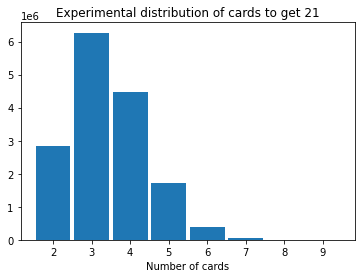

Probablity with spanish deck:  0.15773797


In [5]:
print("Probablity with spanish deck: ", calculate_probability(list(range(1,13))*4, n=100000000))

1. (b): Cards=[1,2,3,4,5,6,7,10,11,12,13]


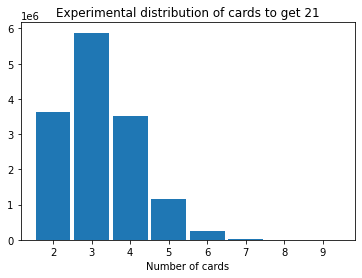

Probablity with poker deck:  0.14468838


In [6]:
print("Probablity with poker deck: ",calculate_probability(list(range(1,14))*4,n=100000000))

# 2. Calculate the probability of getting a 21 drawing cards sequentially from shuffled Spanish 48-deck with card values 

2 (a) Deck=[1,2,3,4,5,6,7,8,9,10,10,10]



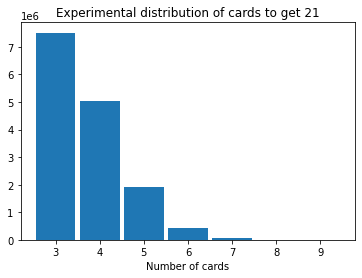

Probablity:  0.14963348


In [7]:
print("Probablity: ",calculate_probability([1,2,3,4,5,6,7,8,9,10,10,10]*4,n=100000000))

2 (b) Deck=[1,2,3,4,5,6,7,8,9,10,10,10,10]

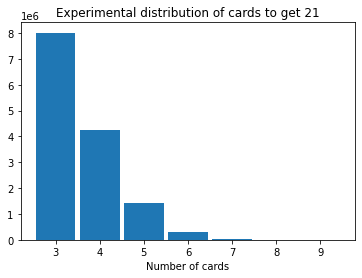

Probablity:  0.14014362


In [8]:
print("Probablity: ",calculate_probability([1,2,3,4,5,6,7,8,9,10,10,10,10]*4,n=100000000))

# 3. Find remaining decks for Spanish and Poker card decks
3 (a) Cards=[1,2,3,4,5,6,7,10,11,12]

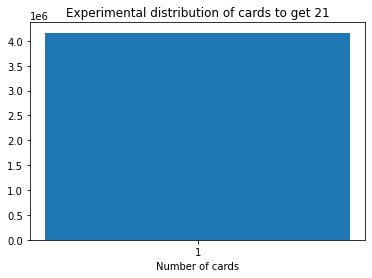

Probablity:  0.04526315


In [9]:
cards=compute_half_deck([1,2,3,4,5,6,7,8,9,10,11,12])
print("Probablity: ", calculate_probability(cards, n=100000000, initial_sum=19))

3 (b) Cards=[1,2,3,4,5,6,7,10,11,12,13]

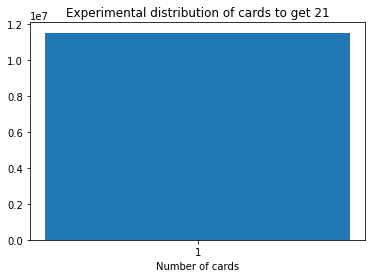

Probablity:  0.12460057


In [10]:
cards=compute_half_deck([1,2,3,4,5,6,7,8,9,10,11,12,13])
print("Probablity: ", calculate_probability(cards, n=100000000, initial_sum=19))

# 4. Find remaining decks for Spanish and Poker card decks

# Hot Deck Probability - SPANISH & POKER
**Anatically.**
Given [7,7,5] the probability of getting 2, is:

1.  Getting one card: 2
2.   Getting two cards: 1, 1

*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)}$ = ${4}\choose{2}$ / ${12}\choose{2} $ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} =  \frac{4}{12}  $ 
*   Probabilidad total:
$P_{(2)}= \frac{4}{12} + \frac{6}{66} = 0.424242$ 


# Cold Deck Probability - SPANISH & POKER
**Anatically.**
Given [7,7,5] the probability of getting 2, is:

1.  Getting one card: 2
2.   Getting two cards: 1, 1

*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad total:
$ P_{(2)} = \frac{0}{12}$ 


In [11]:
hot_deck = [1, 2, 3]*4
cold_deck = [10,11,12]*4

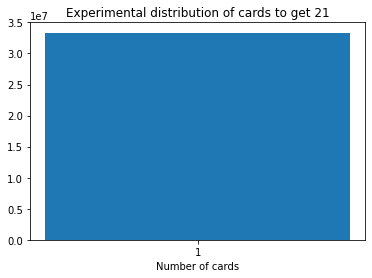

Probablity of the hot deck:  0.42432056


In [12]:
print("Probablity of the hot deck: ", calculate_probability(hot_deck, n=100000000, initial_sum=19))

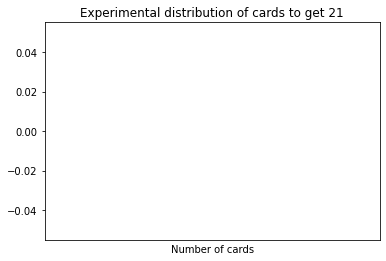

Probablity of the cold deck:  0.0


In [13]:
print("Probablity of the cold deck: ", calculate_probability(cold_deck, n=100000000, initial_sum=19))

In [14]:
hot_deck = [1,2,3]*4
cold_deck = [11,12,13]*4

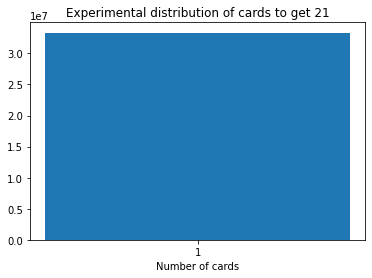

Probablity of the hot deck:  0.4242047


In [15]:
print("Probablity of the hot deck: ", calculate_probability(hot_deck, n=100000000, initial_sum=19))

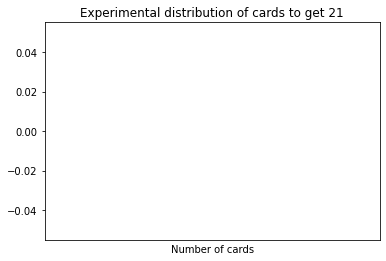

Probablity of the cold deck:  0.0


In [16]:
print("Probablity of the cold deck: ", calculate_probability(cold_deck, n=100000000, initial_sum=19))

#5. Ben goes to Vegas

> Bloque con sangría


What is the estimated amount of money that Ben wins or losses on a weekend estimated with 10 million simulations using both the Spanish and Poker card decks?


**Analisis**
* It is 30 hours of game every weekend. 3 * 10 = 30 hours
* It is equivalent of 1800 minutes. 30 * 60 = 1800 minutes
* It is equivalent of 600 games every weekend (the three days). 1800 minutes / 3 minutes per game = 600 games

In [17]:
def bet_play(cards, games, initial_sum):
  #Cards data
  count = 0
  cards_distribution = []
  min_distribution = 11
  max_distribution = 1
  average_cards = [] 

  #Money data
  money_bet = 1000
  money_earned = 0 

  for j in range(n): #Simulating 10 million times
    cards_distribution = [] #Every weekend, the cards distribution is resetted
    count = 0 #How many times you get 21 in a weekend
    for i in range(games): #This loop represents 600 games, which is 1 weekend of gambling
      cards_copy = cards.copy()
      sum_cards = initial_sum
      cards_count = 0
      while sum_cards < 21:
        choice = r.choice(cards_copy)
        cards_copy.remove(choice)
        sum_cards += choice
        cards_count += 1
      if sum_cards == 21:
        min_distribution = cards_count if cards_count < min_distribution else min_distribution
        max_distribution = cards_count if cards_count > max_distribution else max_distribution
        cards_distribution.append(cards_count)
        count += 1
        money_earned += (money_bet * 12) #Assuming you earn three times what you bet
    if count != 0:
      average_cards.append( sum(cards_distribution) / count ) #Every weekend you get average cards. This accumulates the averages.
    else:
      average_cards.append(0)
  #print_histogram(cards_distribution, min_distribution, max_distribution)
  
  return (money_earned / n, average_cards ) #Returns (average of money earned on a weekend, distribution of the average of cards to get 21)

In [18]:
def hist(datos,xlabel,ylabel, color): 
  plt.hist(datos, bins='auto', facecolor=color)
  plt.xlabel = xlabel
  plt.ylabel = ylabel
  plt.show()

**Hot deck - SPANISH & POKER**

In [19]:
#Data
n = 10000
cards = [1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5] #Assumoing we have a hot deck
initial_sum = 19 # Having [7, 7, 5]
games_per_weekend = 600
money_investedHot = games_per_weekend * 1000

In [20]:
#Results
simulation = bet_play(cards, games_per_weekend, initial_sum) 
money_earnedHot = simulation[0]
distribution = simulation[1]
print("Money Invested: %d\nMoney Earned: %d \nDifference: %d"%(money_investedHot, money_earnedHot,  money_earnedHot - money_investedHot))
print("Average cards to get 21: ", sum(distribution) / len(distribution) ) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21

Money Invested: 600000
Money Earned: 709569 
Difference: 109569
Average cards to get 21:  1.153143295386031


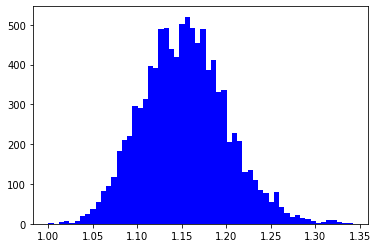

In [21]:
#Histogram hot deck
xlabel='Número de cartas obtenidas para obtener 21'
ylabel='Cantidad de repeticiones'
color='blue'
hist(distribution, xlabel, ylabel, color)

**Cold deck SPANISH**

In [22]:
#Data
n = 10000
cards = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * 4 #Assuming we have a hot deck
initial_sum = 0 # Having nothing
games_per_weekend = 600
money_investedCold = games_per_weekend * 10

In [23]:
#Results
simulation = bet_play(cards, games_per_weekend, initial_sum) 
money_earnedCold = simulation[0]
distribution = simulation[1]
print("Money Invested: %d\nMoney Earned: %d \nDifference: %d"%(money_investedCold, money_earnedCold,  money_earnedCold - money_investedCold))
print("Average cards to get 21: ", sum(distribution) / len(distribution) ) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21

Money Invested: 6000
Money Earned: 1135465 
Difference: 1129465
Average cards to get 21:  3.4153666589270215


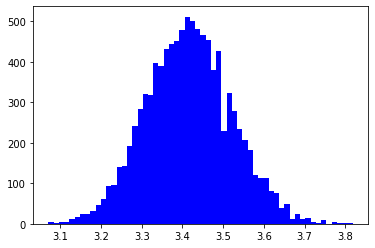

In [24]:
#Histogram cold deck
xlabel='Número de cartas obtenidas para obtener 21'
ylabel='Cantidad de repeticiones'
color='blue'
hist(distribution, xlabel, ylabel, color)

**Cold deck POKER**

In [25]:
#Data
n = 10000
cards = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] * 4 #Assuming we have a hot deck
initial_sum = 0 # Having nothing
games_per_weekend = 600
money_investedCold = games_per_weekend * 10

In [26]:
#Results
simulation = bet_play(cards, games_per_weekend, initial_sum) 
money_earnedCold = simulation[0]
distribution = simulation[1]
print("Money Invested: %d\nMoney Earned: %d \nDifference: %d"%(money_investedCold, money_earnedCold,  money_earnedCold - money_investedCold))
print("Average cards to get 21: ", sum(distribution) / len(distribution) ) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21

Money Invested: 6000
Money Earned: 1043031 
Difference: 1037031
Average cards to get 21:  3.2165181594155636


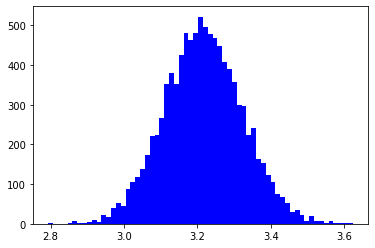

In [27]:
#Histogram cold deck
xlabel='Número de cartas obtenidas para obtener 21'
ylabel='Cantidad de repeticiones'
color='blue'
hist(distribution, xlabel, ylabel, color)

**Summary**
Net money earned

In [28]:
#Hot decks and cold decks
totalAmountEarned = money_earnedHot + money_earnedCold
totalInvested = money_investedHot + money_investedCold
net = totalAmountEarned - totalInvested
print("Net money Ben earned: $", net)

Net money Ben earned: $ 1146601.2


**Results**


*   Money Invested: $1000 per game on hot decks
*   Money Earned on 1 weekend
*   Earnning: Difference between invested and earned



# 6. Extra credits

In [29]:
#Data
n = 10000
initial_sum = 19
games_per_weekend = 600
money_investedCold = games_per_weekend * 1000

Money Invested: 600000
Money Earned: 5142295 
Difference: 4542295
Average cards to get 21:  1.299731399983659


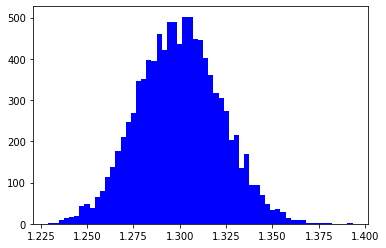

In [30]:
# Hot deck for 8 cards
cards = [1,2]*4
#Results
simulation = bet_play(cards, games_per_weekend, initial_sum) 
money_earnedCold = simulation[0]
distribution = simulation[1]
print("Money Invested: %d\nMoney Earned: %d \nDifference: %d"%(money_investedCold, money_earnedCold,  money_earnedCold - money_investedCold))
print("Average cards to get 21: ", sum(distribution) / len(distribution) ) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21
#Histogram cold deck
xlabel='Número de cartas obtenidas para obtener 21'
ylabel='Cantidad de repeticiones'
color='blue'
hist(distribution, xlabel, ylabel, color)

Money Invested: 600000
Money Earned: 3841935 
Difference: 3241935
Average cards to get 21:  1.2501300994478806


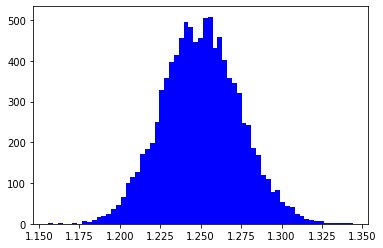

In [31]:
# Hot deck for 10 cards
cards = [1,2]*4 + [3,3]
#Results
simulation = bet_play(cards, games_per_weekend, initial_sum) 
money_earnedCold = simulation[0]
distribution = simulation[1]
print("Money Invested: %d\nMoney Earned: %d \nDifference: %d"%(money_investedCold, money_earnedCold,  money_earnedCold - money_investedCold))
print("Average cards to get 21: ", sum(distribution) / len(distribution) ) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21
#Histogram cold deck
xlabel='Número de cartas obtenidas para obtener 21'
ylabel='Cantidad de repeticiones'
color='blue'
hist(distribution, xlabel, ylabel, color)

Money Invested: 600000
Money Earned: 3841753 
Difference: 3241753
Average cards to get 21:  1.2502441319690072


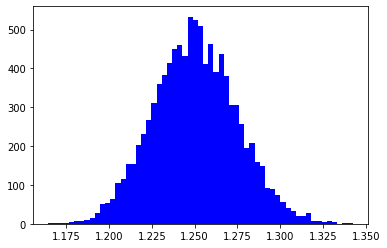

In [32]:
# Hot deck for 12 cards
cards = [1,2]*4 + [3,3]
#Results
simulation = bet_play(cards, games_per_weekend, initial_sum) 
money_earnedCold = simulation[0]
distribution = simulation[1]
print("Money Invested: %d\nMoney Earned: %d \nDifference: %d"%(money_investedCold, money_earnedCold,  money_earnedCold - money_investedCold))
print("Average cards to get 21: ", sum(distribution) / len(distribution) ) #Sums all averages, divides into number of them. This is:  the average of the averages of cards to get 21
#Histogram cold deck
xlabel='Número de cartas obtenidas para obtener 21'
ylabel='Cantidad de repeticiones'
color='blue'
hist(distribution, xlabel, ylabel, color)